# 1D Quantum Mechanics, Numerically

**hushedLecturer**

**5/27/2021**

---
## The Schroedinger Equation
The 1D stationary Schroedinger equation describes the stationary states of a system relating its kinetic energy to a potential:
$$ -\frac{\hbar^2}{2m}\psi''+V(x)\psi=E\psi$$
Alternatively written as
$$ \hat{H}\psi=E\psi$$
where $ \hat{H}=-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2}+V(x)$ is the Hamiltonian operator, of which we can consider solutions $\psi_n$ to be eigen*functions*, whose eigenvalues are the energies $E_n$.

The solutions to the Schroedinger equation are called "probability amplitudes", it's their moduli *squared* that give us the probability density functions for the system.
$$ \mathrm{P(}\mathbb{X}=x\mathrm{)}=\left|\psi(x)\right|^2$$
This gives us our condition for normalizing the wavefunction, as $\int_\mathbb{R}\left|\psi(x)\right|^2\mathrm{d}x = 1$, or "the probability of the particle being located *anywhere at all* is 100%.

Recall that the modulus squared of a quantity is equal to the product of the quantity with its complex conjugate, $\left|k\right|^2 =\bar{k}k$. For reasons that will become *crystal* clear as we find *numeric* solutions, we call this complex-product-then-integrate operation "taking the inner product", and we like to write it in bra-ket notation:
$$\left<\psi_n\right|\left.\psi_n\right>=1$$
The hamiltonian operator, then, can be used to extract the energies of the functions!
$$\left<\psi_n\right|\hat{H}\left.\psi_n\right>=\left<\psi_n\right|E_n\left.\psi_n\right>=E_n$$

---
## The Infinite Square Well
Every introductory quantum course starts students off with the infinite square well potential, or "the particle in a box".
$$V(x)=\left\{\matrix{0&x\in[0,a]\\\infty&\text{otherwise}}\right.$$
This is simple to solve, as the function is zero everywhere outside the boundaries of the box, and the potential is zero within the boundary, giving us a simple linear differential equation to solve:
$$\psi''+\frac{2mE}{\hbar^2}\psi=0$$
$$\psi(0)=\psi(a)=0$$
$$\psi_n=\sqrt{\frac{a}{2}}\sin\left(\frac{n\pi}{a}x\right)$$
$$E_n=\left<\psi_n\right|\hat{H}\left|\psi_n\right>=\frac{\pi^2\hbar^2}{2ma^2}n^2\left|n\in\{1,2,3,...\}\right.$$
---
## Numeric Solutions

**Inner Products? Eigenthings? Why the linear algebra words?**
    
Suppose we let $\boldsymbol{\psi}$ be the vector of function values for $\psi$. This doesn't make sense on its face because $\psi$ is a continuous function over the reals, but we can *approximate* with a dense-enough array of discrete values.

Recall:

$$\hat{H}\psi=(-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2}+V(x))\psi$$
If we can find a way to discretize the Hamiltonian into a matrix, the eigenvectors should approximate our eigenfunctions, and the eigenvalues will approximate our energies!

$\boldsymbol{\psi}$ needs to be an *eigenvector* of our hamiltonian *matrix* $\mathbf{H}$.

First, we should define our symbols. For simplicity's sake:

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
a = np.pi;
m = 1;
hbar = 1;

We want a large number of samples in our discrete array, and we should keep track of the space between each sample:
$$x_{n+1}-x_n=\Delta x$$

In [2]:
samples = 1001;
x = np.linspace(0,a,samples);
dx = a/samples;

The potential $V(x)$ is just a function of $x$ just like $\psi$, so we can call it a linear vector $\mathbf{v}$, with zeros everywhere except for the boundary, where it is arbitrarily large.
$$\mathbf{V}=\left[\matrix{\infty\\0\\\vdots\\0\\\infty}\right]$$

In [3]:
v = np.zeros([samples]);
large = 1e6;
v[0]+=large;
v[-1]+=large;

We want this to multiply $\boldsymbol{\psi}$ and return another vector, so we need a matrix $\mathbf{V}$:

In [4]:
V = np.diag(v);

The kinetic energy term gets interesting, because the derivative as we normally conceive it requires a continuous function. Consider the definition of the limit:
$$f'(x)=\lim_{h\to 0}\frac{f(x+h)-f(x)}{h}$$
If we consider $f_n = f(x_n)$ for some discrete set $\mathbf{x}=\left\{x_1,x_2...x_N\right\}$ evenly spaced where $x_{n+1}-x_n={\Delta}x$, then we can approximate $h\approx{\delta}x$, and the limit to first order can be given by
$$\frac{f_{n+1}-f_n}{{\Delta}x}$$

Then, for the second derivative (taken centrally, to first order),
$$f''(x)=\lim_{h\to0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\to\frac{f_{n+1}-2f_n+f_{n-1}}{{\delta}x^2}$$

So the $n^\mathrm{th}$ kinetic energy term needs the $\boldsymbol{\psi}_{n-1}$, $\boldsymbol{\psi}_n$, and $\boldsymbol{\psi}_{n+1}$ terms. We can do that with a tridiagonal matrix!

The second derivative matrix $\mathbf{D}$ which we want to act on a vector of function values $\mathbf{f}$ then can be written as:
$$\mathbf{D}=\left[\matrix{-\frac{2}{{\delta}x^2}&\frac{1}{{\delta}x^2}&0&0&0&\dots&0&0&0\\\frac{1}{{\delta}x^2}&-\frac{2}{{\delta}x^2}&\frac{1}{{\delta}x^2}&0&0&\dots&0&0&0\\0&\frac{1}{{\delta}x^2}&-\frac{2}{{\delta}x^2}&\frac{1}{{\delta}x^2}&0&\dots&0&0&0\\0&0&\frac{1}{{\delta}x^2}&-\frac{2}{{\delta}x^2}&\frac{1}{{\delta}x^2}&\dots&0&0&0\\&&\vdots&&\ddots&&&\vdots&\\0&0&0&0&0&\dots&\frac{1}{{\Delta}x^2}&-\frac{2}{{\Delta}x^2}&\frac{1}{{\Delta}x^2}\\0&0&0&0&0&\dots&0&\frac{1}{{\Delta}x^2}&-\frac{2}{{\Delta}x^2}}\right]$$

So we can now define our kinetic energy matrix:

In [5]:
t = - hbar**2 * np.array([1/dx**2, -2/dx**2, 1/dx**2]) / (2*m);
trow = np.append(t,np.zeros([1,samples-3]));
T = np.zeros([samples,samples]);
for i in range(samples):
    T[i] = np.roll(trow,i-1);

I am *abundantly* aware that my code makes it so that the derivative "filter" peaks out on the top right and bottom left corners of the matrix. Feel free to set those corners to zero, as would be accurate in the case of the infinite square well, but keep in mind we need to pick bounds at which the wavefuctions are close to zero regardless of the potential.

Having found our kinetic and potential energy terms, we can define our hamiltonian from their sum!
$$\mathbf{H}=\mathbf{T}+\mathbf{V}$$

In [6]:
H = T + V;

We have our hamiltonian matrix, so we can solve for its eigenvectors and eigenvalues. (I use the eigh function because it's *faster* and takes advantage of the fact that $\mathbf{H}$ is *hermitian*, which in *linear algebra land* means it is its own conjugate transpose. We made it symmetric about the main diagonal and all real, so criteria met!)

In [7]:
[E,F] = np.linalg.eigh(H);

Their inner products with themselves over the region need to equal 1:

In [8]:
F = F/np.sqrt(np.dot(F[:,1],F[:,1])*dx);

While we already have the energy eigenvalues, I still find it cool to observe that we can carry out the inner product operation with the hamiltonian transformation to find them, too!
$$\int_\mathbb{R}\bar{\psi}_n\hat{H}\psi_n\mathrm{d}x=\boldsymbol{\psi}\cdot(\mathbf{H}\boldsymbol{\psi}){\Delta}x=E_n$$

In [9]:
np.dot(F[:,5],np.dot(H,F[:,5])*dx)

18.032160164187047

In [10]:
E[5]

18.032160164189225

We can also observe that the numerical energies follow the same $n^2$ pattern we get from the analytical solution.

In [11]:
print(*E[0:5]/E[0],sep='\n')

1.0
4.000064985616435
8.999940815181676
16.000102106305594
24.99950679502524


Finally, let us plot the probability density functions we found, separated by a plot of their energies compared to the potential well:

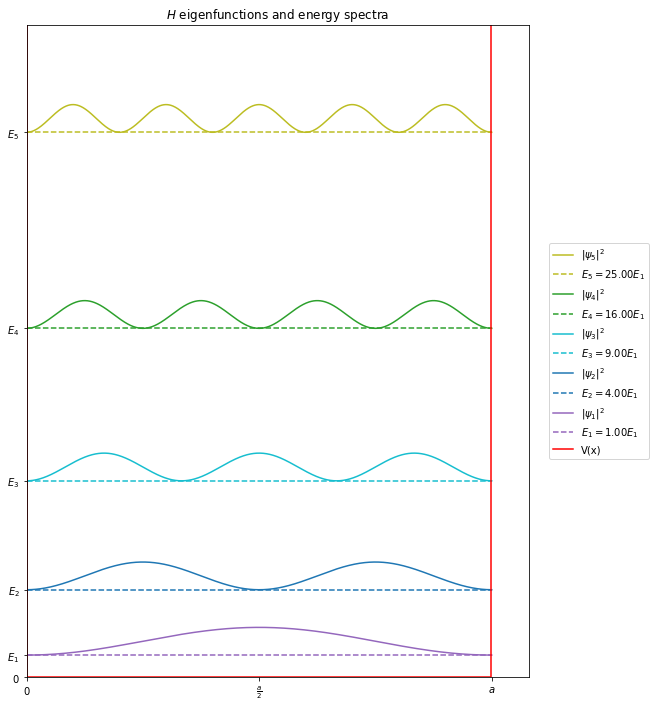

In [12]:
fig, ax = plt.subplots(figsize = (9,12));
colors = ['tab:purple','tab:blue','tab:cyan','tab:green','tab:olive'];
for i in range(5):
    labelpsi = '$\\left|\psi_%d\\right|^2$'%(5-i);
    labelE = '$E_%d = %.2fE_1$'%(5-i,E[4-i]/E[0]);
    plt.plot(
        x,F[:,4-i]*F[:,4-i]+E[4-i],'-',color = colors[4-i],label = labelpsi
    );
    plt.plot(
        x,E[4-i]+np.zeros_like(x),'--',color = colors[4-i],label = labelE
    );
plt.plot(x,v,'r-',label = 'V(x)');
plt.axis([0,a+0.25,0,15]);
ax.legend(loc='center right',bbox_to_anchor=[1.25,0.5]);
plt.title('$H$ eigenfunctions and energy spectra');
plt.xticks([0,a/2,a],['$0$','$\\frac{a}{2}$','$a$']);
plt.yticks(np.append([0],E[0:5]),['$0$','$E_1$','$E_2$','$E_3$','$E_4$','$E_5$']);

---
## The Simple Harmonic Oscillator

This is a little more involved, as the potential is a function of $x$. Classically:
$$V(x)=\frac{1}{2}m(\omega x)^2$$
for mass $m$ and $\omega=\sqrt{\frac{k}{m}}$ is the classical characteristic frequency that relates the constant of restorative force $k$ to the mass.

The analytic solution has energies that progress like the odd numbers, $E_n\propto2n-1\left|n\in[1,2,3,\dots]\right.$. The functions themselves are ugly products of exponentials and polynomials that iterate with derivatives, I'm not going to bother writing them out here.

We have no finite bounds for which these eigenfunctions must be zero beyond, as with the infinite square well, so we just need to pick a range containing the vast majority of the probability amplitude for the energies we care about, because we need to approximate the self-inner products over those bounds as 1. Higher energies $\to$ wider wavefunctions $\to$ wider bounds.

In [13]:
m = 1;
w = 1;
L = 8;
samples = 1001;
x = np.linspace(-L,L,samples);
dx = 2*L/samples;

The Potential:

In [14]:
v = m * w**2 * x*x / 2;
V =  np.diag(v) ;

The kinetic energy is the same as before:

In [15]:
t = - hbar**2 * np.array([1/dx**2, -2/dx**2, 1/dx**2]) / (2*m);
trow = np.append(t,np.zeros([1,samples-3]));
T = np.zeros([samples,samples]);
for i in range(samples):
    T[i] = np.roll(trow,i-1);

... and the hamiltonian matrix:

In [16]:
H = T + V;

Which we find the eigenvalues and eigenfunctions for...

In [17]:
[E,F] = np.linalg.eigh(H);

And then normalize...

In [18]:
F = F/np.sqrt(np.dot(F[:,1],F[:,1])*dx);

Making the same plot as before:

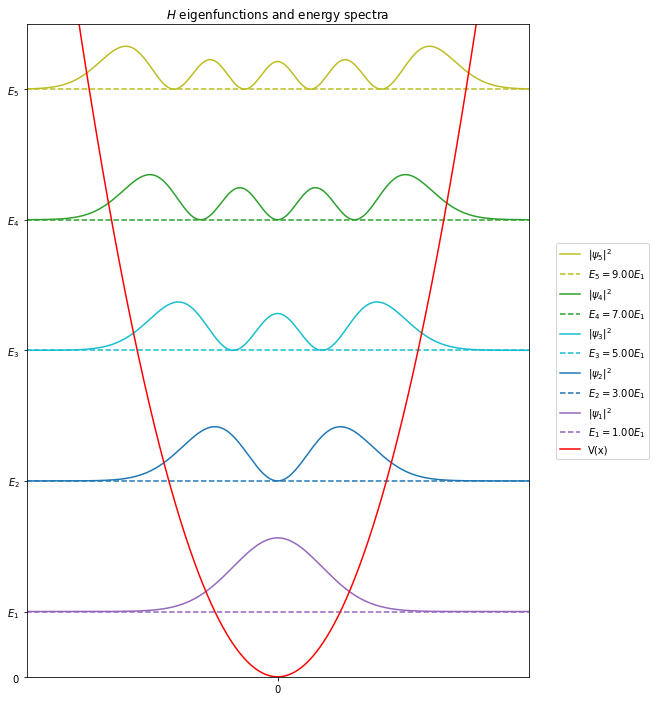

In [19]:
fig, ax = plt.subplots(figsize = (9,12));
colors = ['tab:purple','tab:blue','tab:cyan','tab:green','tab:olive'];
for i in range(5):
    labelpsi = '$\\left|\psi_%d\\right|^2$'%(5-i);
    labelE = '$E_%d = %.2fE_1$'%(5-i,E[4-i]/E[0]);
    plt.plot(
        x,F[:,4-i]*F[:,4-i]+E[4-i],'-',color = colors[4-i],label = labelpsi
    );
    plt.plot(
        x,E[4-i]+np.zeros_like(x),'--',color = colors[4-i],label = labelE
    );
plt.plot(x,v,'r-',label = 'V(x)');
ax.legend(loc='center right',bbox_to_anchor=[1.25,0.5]);
plt.title('$H$ eigenfunctions and energy spectra');
plt.yticks(np.append([0],E[0:5]),['$0$','$E_1$','$E_2$','$E_3$','$E_4$','$E_5$']);
plt.xticks([0]);
plt.xlim([-L/2,L/2]);
plt.ylim([0,5]);


Note the regular spacing of the energies, which are odd multiples of the ground state energy!

---

## In Conclusion

As you can see, this technique is very handily applied to *any* 1D potential, it is simply a matter of defining it as a function-vector and adding it as a diagonal to the kinetic energy term, which is the same every time.

You'll pick up that in *vector* land, every time you would do an integration, you just do a dot product times ${\Delta}x$! Therefore if, for example, you wanted to describe some initial state as a linear combination of basis states $\mathbf{f}=\sum\limits_kc_k\boldsymbol{\psi}_k$, you can evaluate $c_k=\mathbf{f}\cdot\boldsymbol{\psi}_k{\Delta}x$ to find the basis state coefficients $c_k$.

I've been having a lot of fun with this, and if you've read this far perhaps you would, too. Try experimenting with more complicated potentials and see how they turn out!


***Cheers!***

***hushedLecturer***